### CS2101 - Programming for Science and Finance
Prof. Götz Pfeiffer<br />
School of Mathematical and Statistical Sciences<br />
University of Galway

***

# Week 10: Higher-Order Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import math

* We will further explore the relationship between functions in Python and mathematical functions.

In [3]:
def f(x):
    """f(x) computes the cube of x"""
    return x**3

In [4]:
dir(f)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__type_params__']

In [5]:
f.__doc__

'f(x) computes the cube of x'

In [6]:
?f

Signature: f(x)
Docstring: f(x) computes the cube of x
File:      /tmp/ipykernel_267878/1591644188.py
Type:      function

In [7]:
f.__name__

'f'

## Anonymous Functions

* A function in python does not necessarily need to have a name.
* Often, when the function is short, and when it used only once, one can use a **lambda expression** instead of a function definition.


### Example

* A lambda expression to compute cubes can be written as
  ```python
  lambda x: x**3
  ```
* This corresponds somehow to the mathematical notation for functions: $x \mapsto x^3$.
* We can assign this lambda object to a variable and then call it like a function.    

In [8]:
(lambda x: x**4)(3)

81

In [9]:
g = lambda x: x**3
g(2)

8

* But that's somewhat pointless ...

In [10]:
g.__name__

'<lambda>'

In [11]:
?g

Signature: g(x)
Docstring: <no docstring>
File:      /tmp/ipykernel_267878/1947591100.py
Type:      function

In [12]:
g.__doc__

* Anonymous function an be quite useful inside other functions, e.g., as their arguments, or return values ...

In [13]:
mycars = [
    { 'make': 'Ford', 'year': 2015 },
    { 'make': 'VW', 'year': 2013 },
    { 'make': 'Renault', 'year': 2023 }
]
mycars.sort(key = lambda car: car['year'])
mycars

[{'make': 'VW', 'year': 2013},
 {'make': 'Ford', 'year': 2015},
 {'make': 'Renault', 'year': 2023}]

## Functions returning functions

* In Python, functions are **first class objects**.
* In particular, this means that they can be **assigned** to variables, passed as **arguments** to a function, and **returned** by function, just like numbers or strings.
* We shall see some examples of functions returning functions.

### Example.

* As a first example, let's make a function that returns the **power function** $f(x) = x^n$ if $n$ is given as an argument.

In [14]:
def power(n):
    def power_n(x):
        return x**n
    return power_n

In [15]:
p2 = power(2)
[p2(x) for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [16]:
p3 = power(3)
[p3(x) for x in range(10)]

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

* Here, a lambda expression could be used to shorten the definition of `power` as follows.

In [17]:
def power(n):
    return lambda x : x**n

In [18]:
p2 = power(2)
[p2(x) for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

*  We can then loop over such functions

In [19]:
powers = []
for n in range(5):
    p = power(n)
    powers.append([p(x) for x in range(10)])
powers    

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81],
 [0, 1, 8, 27, 64, 125, 216, 343, 512, 729],
 [0, 1, 16, 81, 256, 625, 1296, 2401, 4096, 6561]]

* Or, using list comprehension:

In [20]:
[[power(n)(x) for x in range(10)] for n in range(5)]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81],
 [0, 1, 8, 27, 64, 125, 216, 343, 512, 729],
 [0, 1, 16, 81, 256, 625, 1296, 2401, 4096, 6561]]

* Of course, `power(n)(x)` is and does the same as `x**n`

In [21]:
[[x**n for x in range(10)] for n in range(5)]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81],
 [0, 1, 8, 27, 64, 125, 216, 343, 512, 729],
 [0, 1, 16, 81, 256, 625, 1296, 2401, 4096, 6561]]

## Renaming Functions

* Did I say that `len` is a bad choice of a name?
* Well, it's easy to change to, say, `length`.

In [22]:
length = len

In [23]:
length(range(10))

10

* How long is a piece of string?

In [24]:
length("a piece of string")

17

* Even the documentation works.

In [25]:
?length

Signature: length(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method

* But:

In [26]:
length.__name__

'len'

## Shifting and Stretching

* Shifting ...

In [27]:
def shifted(f, v, h):
    return lambda x: f(x - h) + v

In [28]:
def f(x):
    return (x**3 - x + 1)/2

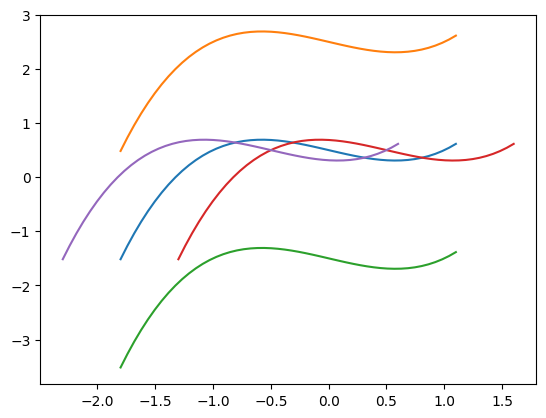

In [29]:
xxx = np.linspace(-1.8, 1.1, 50)
f1, f2 = shifted(f, 2, 0), shifted(f, -2, 0)
f3, f4 = shifted(f, 0, 1/2), shifted(f, 0, -1/2)
plt.plot(xxx, [f(x) for x in xxx])    # blue
plt.plot(xxx, [f1(x) for x in xxx])   # orange
plt.plot(xxx, [f2(x) for x in xxx])   # green
plt.plot(xxx+1/2, [f3(x) for x in xxx+1/2])  # red
plt.plot(xxx-1/2, [f4(x) for x in xxx-1/2])  # purple

* Or like this:

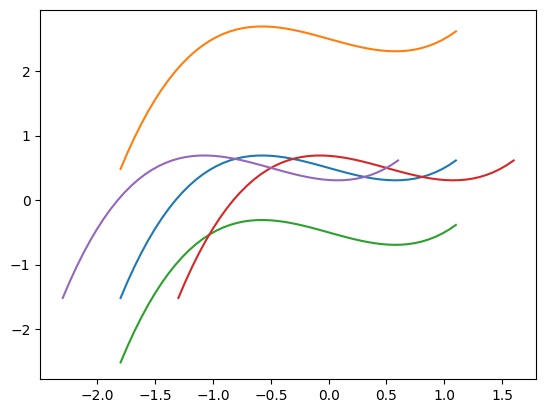

In [30]:
params = [(0,0), (2,0), (-1,0), (0,1/2), (0,-1/2)]
for v, h in params:
    plt.plot(xxx+h, [shifted(f, v, h)(x) for x in xxx+h])  

* ... and stretching:

In [31]:
def stretched(f, v, h):
    return lambda x: v * f(x / h)

In [32]:
def g(x):
    return ((x-3)**3 - (x-3) + 5)/2

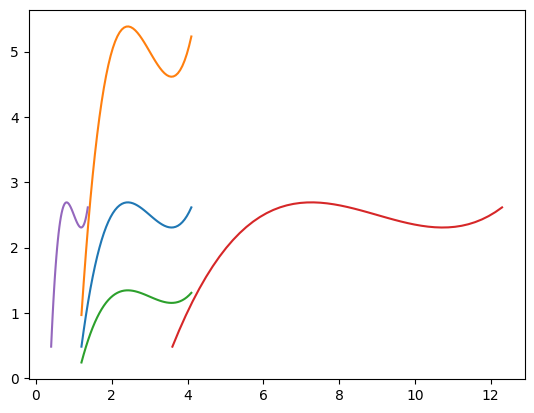

In [33]:
xxx = np.linspace(1.2, 4.1, 50)
params = [(1,1), (2,1), (1/2,1), (1,3), (1,1/3)]
for v, h in params:
    plt.plot(xxx*h, [stretched(g, v, h)(x) for x in xxx*h]) 

### Newton's method

* As motivation and example, we use [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) for approximating  a solution of an equation $f(x) = 0$, where $f \colon \mathbb{R} \to \mathbb{R}$ is a real function.
* The method supposes that we know the function $f(x)$ as well as its derivative $f'(x)$. Then it works as follows:
  1. Choose an initial solution $x_0$ and a desired tolerance value $\varepsilon$.
  2. Iteratively improve the solution using the formula $$x_{n+1} = x_n - f(x_n)/f'(x_n)$$ until $f(x_n) < \varepsilon$.


* Let us try and implement Newton's method.
* The first obstacle is that even if we have a Python function implementing the function $f(x)$ in the equation we wish to solve, we might not have a good way of determining it derivative $f'(x)$.

#### Computing the Derivative of A Function

* So we start with implementing a Python function that computes an **approximation** to the derivative of $f(x)$.
* Recall the **definition of the derivative** of a function $f(x)$:
$$
f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.
$$
* Thus, for sufficiently small $h$, we get the following approximation of the derivative:
$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}.
$$
* While it is not entirely clear what "sufficiently small" means, this is something we can implement in Python.
* As a function `diff` with the following parameters:  
  1. the function $f(x)$ that we wish to differentiate,
  2. the value of $h$,    
  returning a Python function that computes the derivative $f'(x)$.

In [34]:
def diff(f, h):
    '''return an approximation of f'(x) using the formula
       f'(x) ~ (f(x+h) - f(x))/h'''
    def fprime(x):
        return (f(x+h) - f(x))/h
    return fprime

* Or, using a lambda expression, like so:
  

In [35]:
def diff(f, h):
    """f'(x) ~ (f(x+h) - f(x))/h"""
    return lambda x: (f(x+h) - f(x))/h

* **Example.** We'll use the `diff` function to compute an approximation of the derivative of $f(x) = \sin(x)$.
* Let's take $h = 0.0001 = 10^{-4}$.

In [36]:
f = math.sin
h = 10**-4
fprime = diff(f, h)

* Now, when we call `fprime` with some value, say 3, it returns
  $$
  \frac{\sin(3 + 10^{-4}) - \sin(3)}{10^{-4}}
  $$
* Whatever the value of $x$, this function `fprime` will use the same value for `h` once and for all.

In [37]:
fprime(3)

-0.9899995509529691

In [38]:
[fprime(x) for x in np.linspace(2, 4, 5)]

[-0.4161923007262036,
 -0.8011735378210538,
 -0.9899995509529691,
 -0.9364391465704891,
 -0.6536057796480144]

#### Investigating `diff`.

* You know that $f'(x) = \cos x$.
* Let's plot `math.cos(x)` and our `fprime` side by side, on the interval $[0, 2\pi]$.

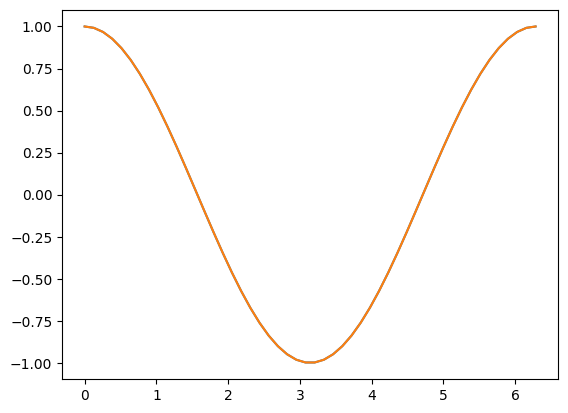

In [39]:
xxx = np.linspace(0, 2*math.pi) # default: 50 x-values
plt.plot(xxx, [fprime(x) for x in xxx])
plt.plot(xxx, [math.cos(x) for x in xxx])

* They're hard to tell apart: the orange curve (for `math.cos`) almost completely covers the blue curve (for `fprime`)!
* Perhaps a plot of the actual difference between those two functions reveals more ...

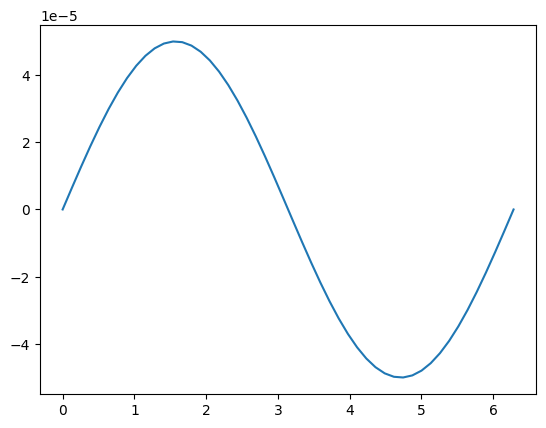

In [40]:
yyy = [math.cos(x) - fprime(x) for x in xxx]
plt.plot(xxx, yyy)

* Hmm ...  (discuss)

In [41]:
print(yyy)

[1.66666658252268e-09, 6.395511154111411e-06, 1.2684341347934946e-05, 1.8764895084899536e-05, 2.4537330176599426e-05, 2.9906862357598207e-05, 3.4785325056851946e-05, 3.909261365664385e-05, 4.275800156505749e-05, 4.5721306029478104e-05, 4.7933867574123656e-05, 4.935935453639906e-05, 4.997436427867097e-05, 4.9768795346669115e-05, 4.874602437432429e-05, 4.692284481155884e-05, 4.432919515656719e-05, 4.1007660899206044e-05, 3.701278023671151e-05, 3.2410152561057615e-05, 2.7275349859245956e-05, 2.169268759022458e-05, 1.575383133389785e-05, 9.55629751775433e-06, 3.2018498368202586e-06, -3.2051721594594795e-06, -9.559565263939085e-06, -1.5756990951132366e-05, -2.1695686969747108e-05, -2.727813964475967e-05, -3.241268675790998e-05, -3.701501809949548e-05, -4.1009567665617475e-05, -4.4330736462205866e-05, -4.6923997708447907e-05, -4.8746767243451616e-05, -4.976911590096056e-05, -4.99742573231432e-05, -4.9358822430789484e-05, -4.793291804755517e-05, -4.571995520119554e-05, -4.27562718757768e-05, 

#### Implementing Newton's Method

* Next, we use `diff` to implement Newton's method as a function `newton` which takes as arguments the function `f` (from the equation $f(x) = 0$), a small tolerance `eps` (so that we stop can stop searching for $x$ once $|f(x)| < \epsilon$), and the small value `h` needed for the derivative $f'(x)$.
* A call to  `newton(f, eps, h)` will then **return a function** `solve(x)` that takes an initial guess `x`, and computes an **approximate root** to the function $f$.
* As before, we fix `eps` and `h` from the start.

In [42]:
def newton(f, eps, h):
    '''Return a function that given an initial guess, approximately solves f(x) = 0'''
    fprime = diff(f, h) # fprime is the derivative of f
    def solve(x):
        while abs(f(x)) >= eps:
            x -= f(x)/fprime(x)
        return x
    return solve

* Let's try to solve an equation that we know the solution to, namely
  $$
  \sin(x) = \frac{\sqrt{2}}{2}
  $$
* The solutions are: $x = \pi/4 + 2\pi n$ and $x = 3\pi/4 + 2\pi n$ for $n \in \mathbb{Z}$. (Check!)

In [43]:
eps = h = 10**-5
f = lambda x:  math.sin(x) - math.sqrt(2)/2
eqsolve = newton(f, eps, h)

In [44]:
approx_solution = eqsolve(0)
print(approx_solution)

0.7853945557170668


* Compare this to the exact root $\pi/4$.

In [45]:
abs(math.pi/4 - approx_solution)

3.6076803814344416e-06

* Let's get a list of approximate roots for different starting points.

In [46]:
approxroots = np.array([eqsolve(x) for x in np.linspace(0,10)])
print(approxroots)

[  0.78539456   0.78539625   0.78539791   0.78539816   0.78539804
   0.78539781   0.78539814   0.78539816   7.06858004   2.35619523
   2.35620108   2.35619449   2.35620132   2.35619456   2.35619556
   2.35619777   2.35619718   2.35619455   2.35620649   2.35620803
  -3.92699057   0.78539777  -3.92698719 -87.17919636   7.06858347
   8.63938339   8.63938341   7.06858347   7.06858347   7.06858347
   7.06858139   7.06857997   7.06858204   7.06858334   7.06858347
   7.06857861   7.06858161   7.06858331  19.63495277   8.6393798
   8.63937992   8.6393813    8.63938316   8.6393798    8.63937995
   8.63938131   8.63938335   8.63938179   8.6393798    8.6393798 ]


* Convert the solutions list to the integers $\{k : \frac{k \pi}{4} \in \mathtt{approxroots}\}$.

In [47]:
mults = approxroots * 4 / math.pi
print(mults)

[   0.99999541    0.99999756    0.99999967    1.            0.99999984
    0.99999955    0.99999997    1.            8.99999564    3.00000094
    3.00000839    3.            3.0000087     3.00000009    3.00000136
    3.00000418    3.00000342    3.00000007    3.00001528    3.00001724
   -4.99999968    0.9999995    -4.99999538 -111.00000028    9.
   11.00000458   11.0000046     9.            9.            9.
    8.99999735    8.99999555    8.99999818    8.99999984    9.
    8.99999381    8.99999763    8.9999998    24.99999833   11.00000001
   11.00000016   11.00000191   11.00000428   11.           11.00000019
   11.00000193   11.00000453   11.00000254   11.           11.        ]


* Round to actual integer values, and check how close the original approximations are to integer values.

In [48]:
numbers = np.round(mults, 0)
print(np.max(np.abs(numbers - mults)))

1.723738802761332e-05


* Finally, list all the integers that occur, and the set of their values modulo $8$.

In [49]:
print(numbers)
print(set(numbers % 8))

[   1.    1.    1.    1.    1.    1.    1.    1.    9.    3.    3.    3.
    3.    3.    3.    3.    3.    3.    3.    3.   -5.    1.   -5. -111.
    9.   11.   11.    9.    9.    9.    9.    9.    9.    9.    9.    9.
    9.    9.   25.   11.   11.   11.   11.   11.   11.   11.   11.   11.
   11.   11.]
{np.float64(1.0), np.float64(3.0)}


* So, modulo $8$, only $\frac{\pi}{4}$ and $\frac{3\pi}{4}$ are found as solutions, which agrees with the actual solutions.

## References

* Newton's Method: [wikipedia](https://en.wikipedia.org/wiki/Newton%27s_method)
* Euler's Method: [wikipedia](https://en.wikipedia.org/wiki/Euler_method)

### Python

* [dir](https://docs.python.org/3/library/functions.html#dir)
* [lambda](https://docs.python.org/3/reference/expressions.html#lambda)
* [lambda expressions](https://realpython.com/python-lambda/)
* [/](https://stackoverflow.com/questions/28243832/what-is-the-meaning-of-a-forward-slash-in-a-python-method-signature-as-show)

##  Exercises

* Implement Euler's method for the approximate numerical solution of a first-order initial value problem of the form
  $$
  \begin{cases}
  y' = f(t, y(t)) \\
  y(t_0) = y_0
  \end{cases}
  $$
  as a function `euler` that takes $f$, $t_0$, $y_0$ and a stepsize $h$ as arguments, and constructs and returns a function `solver` with parameter `n` that computes a approximation of the solution $y(t_n)$, where $t_n = t_0 + nh$, and $y_{i+1} = y_i + h f(t_i, y_i)$.

* Use your function `euler` to approximately solve the initial value problem
  $$
  \begin{cases}
  y' = 2y + t^2 - t \\
  y(0) = 1
  \end{cases}
  $$
  using a step size of $h = 0.01$.  This initial-value problem has the exact solution $y(t) = e^{2t} -t^2/2$ which can be verified by differentiation.  Plot your solution and the exact solution over `np.linspace(0, 1, 101)`.